<a href="https://colab.research.google.com/github/phnx4um/logistic_reg/blob/master/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline 

In [146]:
data = [[15, 10, 0], [13, 6, 0], [14,8, 0], [12, 9, 0], [10, 7, 0],  [12, 6, 0], [11, 8, 0], [13, 10, 0], [10, 6, 0], 
        [8, 12, 1],  [6, 11, 1], [8, 14,1], [9, 14, 1], [10, 15, 1], [9, 12, 1], [7, 10, 1], [8, 13, 1]]

In [147]:
print(data)

[[15, 10, 0], [13, 6, 0], [14, 8, 0], [12, 9, 0], [10, 7, 0], [12, 6, 0], [11, 8, 0], [13, 10, 0], [10, 6, 0], [8, 12, 1], [6, 11, 1], [8, 14, 1], [9, 14, 1], [10, 15, 1], [9, 12, 1], [7, 10, 1], [8, 13, 1]]


In [148]:
random.shuffle(data)

[[12, 9, 0], [13, 10, 0], [6, 11, 1], [7, 10, 1], [15, 10, 0], [9, 14, 1], [8, 14, 1], [8, 13, 1], [9, 12, 1], [12, 6, 0], [10, 15, 1], [11, 8, 0], [10, 6, 0], [13, 6, 0], [10, 7, 0], [8, 12, 1], [14, 8, 0]]
17


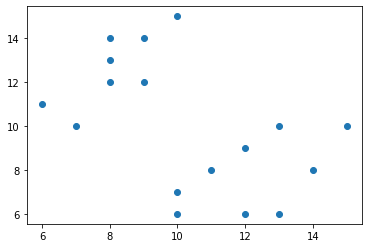

In [149]:
print(data)
print(len(data))

x = [p[0] for p in data]
y = [p[1] for p in data]

plt.scatter(x,y)
plt.show()

  

***Vectorised Version***

In [150]:
def sigmoid(x):
  return 1/(1 + np.exp(-x)) 

In [152]:
input = [ point[0:2] for point in data ]
output = [point[-1] for point in data]
print(input)
print(output)

[[12, 9], [13, 10], [6, 11], [7, 10], [15, 10], [9, 14], [8, 14], [8, 13], [9, 12], [12, 6], [10, 15], [11, 8], [10, 6], [13, 6], [10, 7], [8, 12], [14, 8]]
[0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0]


In [156]:
# ADD loocv
total_err = []
for i in range(len(input)):
  loocv_input = input[:i] + input[i+1:]
  loocv_output = output[:i] + output[i+1:]

  validate_input = input[i]
  validate_output = output[i]

  X = np.array(loocv_input)
  X = X.T

  y = np.array(loocv_output)
  y = y.reshape(1, len(y))

  W = np.array([-0.1,0.1]).reshape(2,1)
  B = 0.1
  a = 0.002

  # training 
  epochs = 50000
  for i in range(epochs): 
    dw = np.array([0,0]).reshape(2,1)
    db = 0

    Z = np.dot(W.T, X) + B

    A = 1/(1 + np.exp(-Z))

    dZ = A - y

    dw = 1/X.shape[1] * (np.dot(X, dZ.T))
    db = 1/X.shape[1] * np.sum(dZ)

    W = W - (a * dw)
    B = B - (a * db) 

  print(W)
  print(B)
  print()

  total_err.append(err(validate_input, validate_output, W, B))

print(total_err)
print(len(total_err))
loocv_err = sum(total_err)/len(total_err)
print(loocv_err)

[[-1.73776458]
 [ 1.71075633]]
0.09140402201491314

[[-1.73743123]
 [ 1.71272399]]
0.08016387566545852

[[-1.77719673]
 [ 1.73494859]]
0.09152456182111807

[[-1.72987554]
 [ 1.66896813]]
0.06793142626074725

[[-1.7788897 ]
 [ 1.73762844]]
0.09135562646171999

[[-1.77711522]
 [ 1.73372996]]
0.0997653772293402

[[-1.78068921]
 [ 1.73827658]]
0.09714684987109616

[[-1.77714254]
 [ 1.73416366]]
0.09683078529998769

[[-1.72934249]
 [ 1.65218396]]
0.10496354952053571

[[-1.78132225]
 [ 1.73907521]]
0.09743807327804802

[[-1.77708789]
 [ 1.73326421]]
0.10292237037582298

[[-1.73795699]
 [ 1.70866493]]
0.10279625080145365

[[-1.7702599 ]
 [ 1.72913685]]
0.10519209159700209

[[-1.78206232]
 [ 1.7398471 ]]
0.09658332105092274

[[-1.73801623]
 [ 1.70642492]]
0.11446766825006735

[[-1.76572454]
 [ 1.71948717]]
0.09515793963791959

[[-1.78127337]
 [ 1.73927567]]
0.09503891783296416

[0.0046667224698958, 0.004600899250670484, 0.00020086467143569603, 0.009530548454276483, 9.945998451065399e-05, 0.000

In [154]:
def err(point, y , W, B):
  w0 = W[0][0]
  w1 =  W[1][0]
  b = B

  x0 = point[0]
  x1 = point[1]
  y = y

  z = (w0 * x0) + (w1 * x1) + b
  a = sigmoid(z) 

  loss = -((y * np.log(a)) + ((1 - y) * np.log(1 - a)))
  return loss

# Error Calculations for all points

In [114]:
# error values
output = []
for point in data:
  output.append(err(point, W, B))

for result in output:
  print(result)

0.004117747427420111
0.0012960468373146583
0.003948560875223476
0.006934243849589541
2.1649636220233932e-05
4.141624901536757e-05
1.9903787348126992e-05
0.00754019590854437
0.0037863125656506704
3.7096733279676963e-06
0.0002130489681525634
0.0002416830016492275
0.0002520585784985866
0.00023173446887292683
0.003630719022882951
0.000737111005833924
0.0001067875021923253


# PREDICTIONS

In [116]:
def predict(point, W, B):
  w0 = W[0][0]
  w1 =  W[1][0]
  b = B

  x0 = point[0]
  x1 = point[1]
  y = point[-1]

  z = (w0 * x0) + (w1 * x1) + b
  a = sigmoid(z) 

  if (a > 0.5):
    pre = 1
  else: 
    pre = 0

  output = 'incorrect'
  if y == pre:
    output = 'correct'
  
  print(y , pre, output) 

In [120]:
# predictions
print('T', 'P', 'isC')
for point in data:
  predict(point, W, B)

T P isC
0 0 correct
1 1 correct
0 0 correct
1 1 correct
0 0 correct
1 1 correct
0 0 correct
1 1 correct
0 0 correct
0 0 correct
1 1 correct
1 1 correct
1 1 correct
1 1 correct
0 0 correct
0 0 correct
0 0 correct


# NON-VECTORISED VERSION

In [49]:
# training loop
w0 = -0.1
w1 = 0.1
b = 0.1
a = 0.002

epochs = 50000
for i in range(epochs):
  # loop over all the points to calculate the gradient
  dw0 = 0
  dw1 = 0
  db = 0
  J = 0

  for point in data:

    x0 = point[0]
    x1 = point[1]
    y = point[-1]

    z = (w0 * x0) + (w1 * x1) + b
    # print(z)
    a = 1/(1 + np.exp(-z))  # sigmoid
    # print(a)

    J += -((y * np.log(a)) + ((1 - y) * np.log(1 - a)))

    dz = a - y  # dL/dz derivative of loss function wrt z

    dw0 += dz * x0
    dw1 += dz * x1
    db += dz

  dw0 /= len(data)
  dw1 /= len(data)
  db /= len(data)
  J/= len(data)

  if i % 5000 == 0:
    print(J)

  # gradient descent step
  w0 = w0 - (a * dw0)
  w1 = w1 - (a * dw1)
  b  =  b - (a * db) 

print()
print(w0, w1, b)


0.4999301901794093
0.009835584348704829
0.0075713420205596816
0.006498373669529025
0.005831107334617692
0.005361308248018829
0.005005809399761889
0.004723764174945111
0.004492369221632034
0.004297722945930215

-1.5241598359611988 1.4843930678735349 0.09446864075475009
0.004130817105717906
